In [13]:
import numpy as np
from numpy.random import binomial
from scipy.stats import binom
import pandas as pd
from math import factorial
import matplotlib.pyplot as plt

# Distribuciones discretas

### Distribución Binomial

$$
P(k, n; p) = {n \choose k} p^k (1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k}
$$

In [3]:
# definición de la distribución binomial 
def my_binomial(k, n, p):
  return factorial(n)/(factorial(k)*(factorial(n-k)))*pow(p,k)*pow(1-p, n-k)

In [4]:
print('my binomial: {}'.format(my_binomial(2, 3, 0.5)))
dist = binom(3, 0.5)
dist.pmf(2)

my binomial: 0.375


0.3750000000000001

### Simulaciones de secuencias con generadores aleatorios

* Los generadores aleatorios tienen como propósito simular muestras de datos que resultarían de muestreos en la vida real de procesos aleatorios como lanzar una moneda o un dado.

In [5]:
# simulación con 100 lanzamientos de moneda equilibrada
# (ejecuta esta celda varias veces para observar la variación en los resultados)
p=0.5
n=3
binomial(n, p)

3

In [6]:
# Vamos a hacer un experimento generando una muestra de conjuntos de lanzamientos de a 3 monedas
arr = []
for _ in range(100):
  arr.append(binomial(n, p))

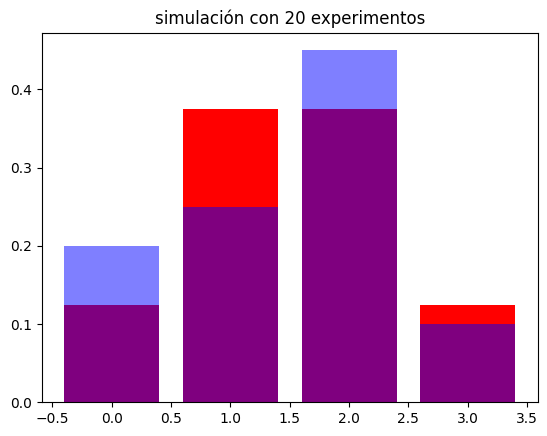

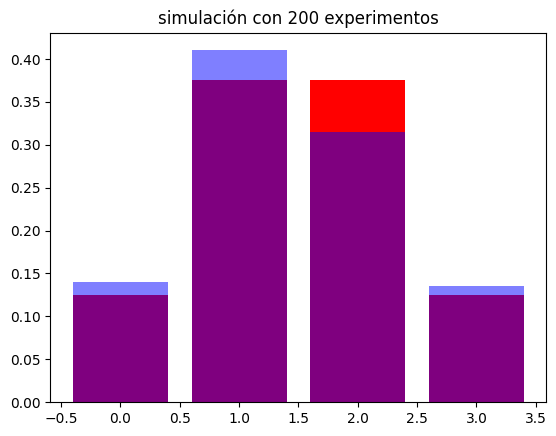

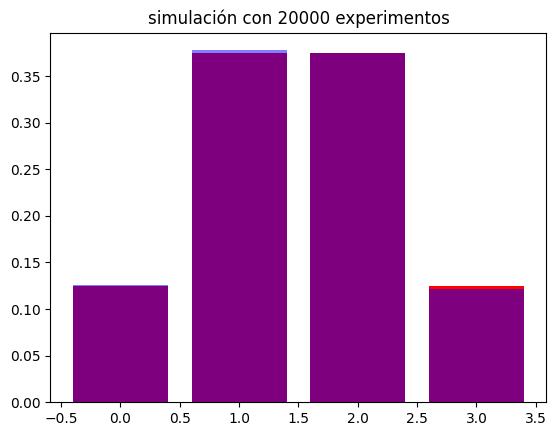

In [7]:
def plot_hist(num_trials):
  values = [0,1,2,3]
  arr = []
  for _ in range(num_trials):
    arr.append(binomial(3, 0.5))
  distribucion_simulada = np.unique(arr, return_counts=True)[1]/len(arr)
  distribucion_teorica = [binom(3, 0.5).pmf(k) for k in values]
  plt.bar(values, distribucion_teorica, label = 'teoría', color = 'red')
  plt.bar(values, distribucion_simulada, label = 'simulación', alpha = 0.5, color = 'blue')
  plt.title('simulación con {} experimentos'.format(num_trials))
  plt.show()

plot_hist(20)
plot_hist(200)
plot_hist(20000)

# Distuciones continuas

### Distribucion normal (gaussiana)
$$P(X) = \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left[-\frac{1}{2}\left(\frac{X-\mu}{\sigma} \right)^2 \right]}$$

* $\mu$: media de la distribución
* $\sigma$: desviación estándar de la distribución

In [8]:
# definimos nuestra distribución gaussiana
def gaussian(x, mu, sigma):
  return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*pow((x-mu)/sigma,2))

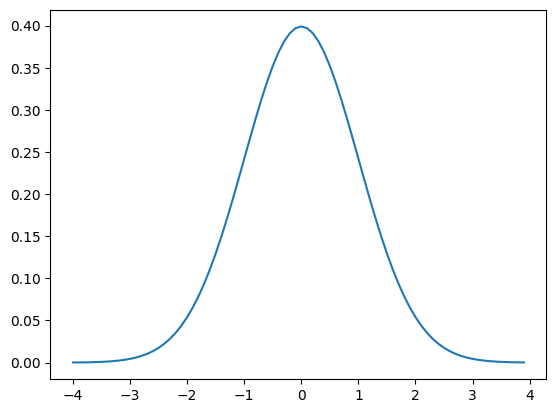

In [9]:
x = np.arange(-4,4,0.1)
y = gaussian(x, 0.0, 1.0)

plt.plot(x, y)

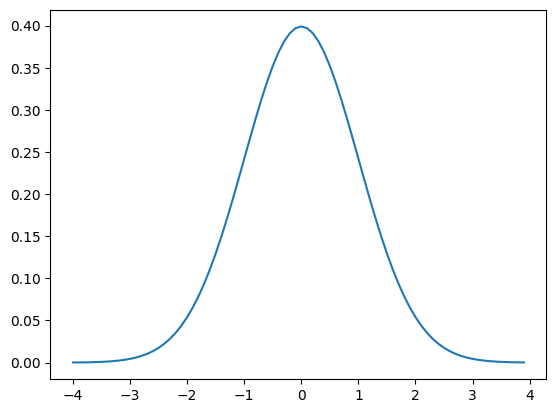

In [10]:
# usando scipy
from scipy.stats import norm 

dist = norm(0, 1)
x = np.arange(-4,4,0.1)
y = [dist.pdf(value) for value in x]
plt.plot(x, y)

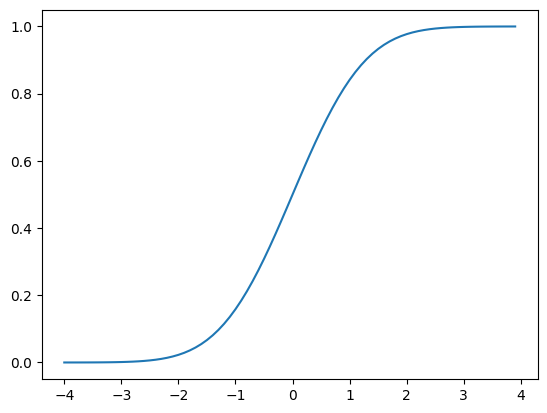

In [11]:
# calculando la distribución acumulada
dist = norm(0, 1)
x = np.arange(-4,4,0.1)
y = [dist.cdf(value) for value in x]
plt.plot(x, y)

### Distribución normal (gausiana) a partir de los datos

* *El archivo excel* lo puedes descargar en esta página: https://seattlecentral.edu/qelp/sets/057/057.html

[37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55]


<BarContainer object of 19 artists>

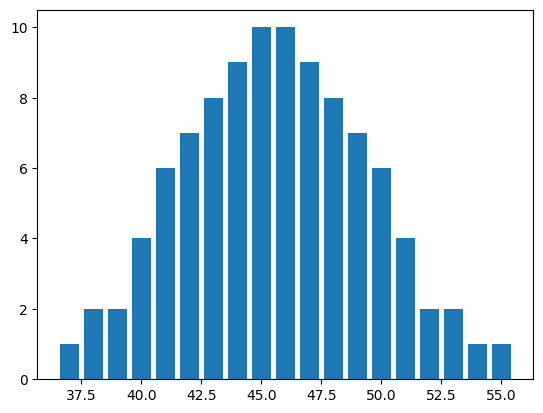

In [15]:
df = pd.read_excel('s057.xlsx')
arr = df['Normally Distributed Housefly Wing Lengths'].values[4:]
values, dist = np.unique(arr, return_counts=True)
print(values)
plt.bar(values, dist)

<BarContainer object of 19 artists>

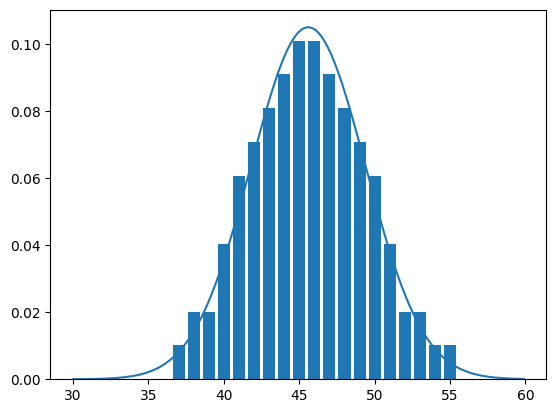

In [16]:
# estimación de la distribución de probabilidad
mu = arr.mean()

#distribución teórica
sigma = arr.std()
dist = norm(mu, sigma)
x = np.arange(30,60,0.1)
y = [dist.pdf(value) for value in x]
plt.plot(x, y)

# datos
values, dist = np.unique(arr, return_counts=True)
plt.bar(values, dist/len(arr))

# ¿Como estimar una distribución?
 Cuando tenemos un conjunto de datos, el proposito es ajustarlo a una distribución para que podamos saber su comportamiento y así realizar predicciones. Para ello tendremos dos métodos principales, las estimación paramétrica y no paramétrica.

### Estimación paramétrica

Suponemos que los datos siguen una distribución y ajustamos los parámetros de acuerdo a los datos; es decir, calculamos estadísticos como media o desviacion estandar y los colocamos como parámetros de la función de distribución

In [20]:
from numpy.random import normal

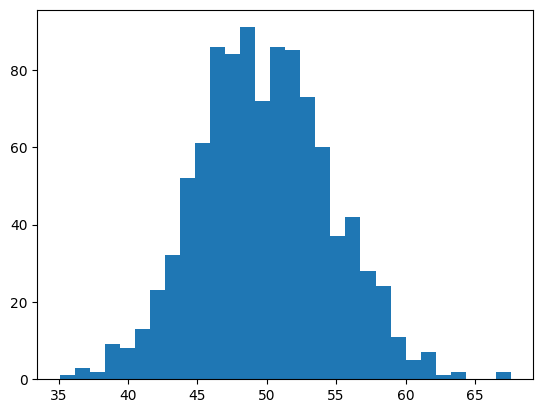

In [23]:
# generamos una muestra aleatoria de datos que se distribuyen de forma normal a ojo
sample = normal(loc=50, scale=5, size=1000) # mu = 50, sigma = 5
plt.hist(sample, bins=30) 
plt.show()


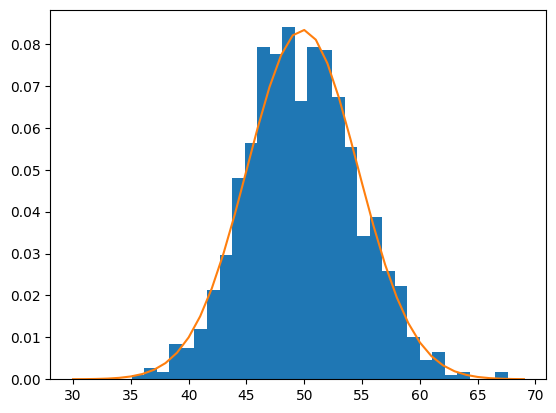

In [24]:
#calculamos la media y desv. estandar de la muestra anterior
mu = sample.mean()
sigma = sample.std()
dist = norm(mu, sigma)
# generamos una serie de puntos que sigan una distribucion con esos estadisticos
# y lo comparamos con los datos de la muestra
values = [value for value in range(30, 70)]
probabilities = [dist.pdf(value) for value in values]
plt.hist(sample, bins=30, density=True)
plt.plot(values, probabilities)
plt.show()

### Estimación no paramétrica
La estimación no paramétrica se aplica cuando los datos no se ajustan a ninguna distribución conocida.

Lo que haremos será una combinación de varias distribuciones por el método de `Kernel Density estimation`. Este se basa en dos cosas:
* [parámetro de suavizado]: smoothing parameter 
* [función base]: basis function

https://scikit-learn.org/stable/modules/density.html


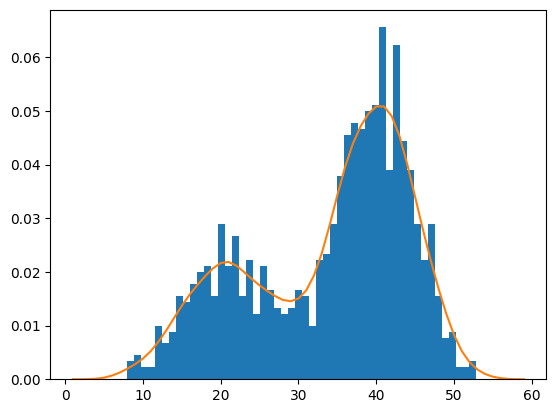

In [25]:
from numpy import hstack
from sklearn.neighbors import KernelDensity

#construimos una distribución bimodal
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))

#generamos el modelo que se entrenará con los datos
model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)

#generamos puntos para graficarlos a través de una lineplot
values = np.asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values) #probabilidad logarítmica
probabilities = np.exp(probabilities)  # inversión de probabilidad


#comparamos la lineplot generada con los puntos de la muestra
plt.hist(sample, bins=50, density=True) 
plt.plot(values[:], probabilities)